# The Sparks Foundation (Grip June 2021)
## Task :- Prediction Using Supervised ML
### Objective :- Predict the percentage of score of a student who studied 9.25 hours per day

## Data Loading

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# Read the data

data_link = "http://bit.ly/w-data"
df = pd.read_csv(data_link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

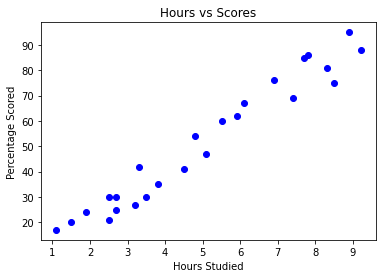

In [7]:
# Scatter plot of Hours vs Scores

plt.scatter(df.Hours, df.Scores, label="Scores", c="blue")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

## Data Modelling

From the Scatter Plot, it is clear that Hours & Scores have a positive linear relationship.

In [8]:
# Separating the input and output values

x = df[["Hours"]]
y = df["Scores"]

In [9]:
# Spliting the dataset in Train & Test data (Train dataset to build the model & Test dataset for prediction)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
# fitting dataset into model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
# printing the value of Intercept and Coefficient of Independent variable

print("Intercept :", model.intercept_)
print("Coefficient :", model.coef_)
line = model.intercept_ + x*model.coef_

Intercept : 2.018160041434683
Coefficient : [9.91065648]


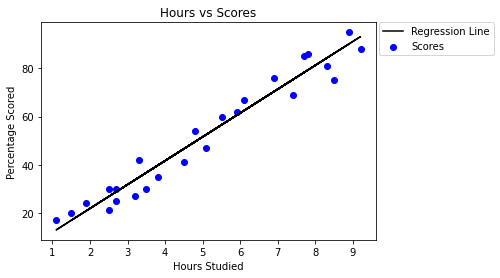

In [12]:
# Visualisation of Regression Line

plt.scatter(df.Hours, df.Scores, label="Scores", c="blue")
plt.plot(x, line, c="black", label="Regression Line")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)
plt.show()

## Predicting & Inferring

In [13]:
# predicting the percentage value

y_pred = model.predict(x_test)
data_pred = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})         # comparing actual vs predicted value
data_pred                                                         

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


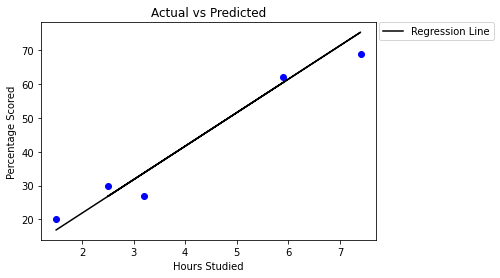

In [14]:
# Visualisation of Actual vs Predicted

plt.scatter(x_test, y_test, c="blue")
plt.plot(x_test, y_pred, c="black", label="Regression Line")
plt.title("Actual vs Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.legend(bbox_to_anchor=(1.01,1), borderaxespad=0)
plt.show()

In [15]:
# Calculating the model accuracy

print("Training Score :", model.score(x_train, y_train))
print("Testing Score :", model.score(x_test, y_test))

print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))     # Absolute Error
print("R2 Score :", r2_score(y_test, y_pred))

Training Score : 0.9515510725211552
Testing Score : 0.9454906892105356
Mean Absolute Error : 4.183859899002975
R2 Score : 0.9454906892105356


In [16]:
# predicting the given hours of study

Hours_studied = [[9.25]]                    # predicting score for students with given hours of studing.
pred_score = model.predict(Hours_studied)
print("Hours Studied :", Hours_studied)
print("Predicted Score :", pred_score)

Hours Studied : [[9.25]]
Predicted Score : [93.69173249]


If a student studied for 9.25 hours per day, then we can predict that the student is expected to score 93.69% (approx).

## THANK YOU !!!